<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Apr 18 14:33:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.2


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

The three areas where cv is currently is used are: object detection, autonomous vehicle and robotics.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In machine learning overfitting is the condition where the model performs pretty good in training data whereas it leads to bad performance in testing data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

There are multiple ways to prevent overfitting. Among them three are below:
- **Regularization** : It helps by shrinking down the weights by adding penalty in the cost function. It can be L2/L1 regularization or dropout regularization.
- **Using another NN architecture** : Different neural network achitecture can help in more generalization of the training data. 
- **Getting more training data** : Newer data points can shift the parameters of the network helping for better generalization.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision 
from torchvision import datasets 
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data" , 
                            download= True , 
                            train=True , 
                            transform= ToTensor()
                            )
test_data = datasets.MNIST(root = "data"  , 
                           download= True , 
                           train = False , 
                           transform= ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 95700868.82it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 46059199.17it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26735522.14it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6803760.27it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
import matplotlib.pyplot as plt 

In [5]:
class_names = train_data.classes

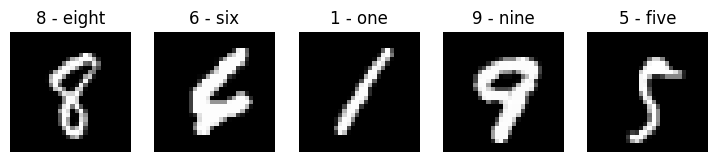

In [14]:
# torch.manual_seed(42)  #--> Uncomment for same images every-time🖼️
fig = plt.figure(figsize=(9 , 9))
for i in range(5):
    random_idx = torch.randint(0 , len(train_data) , size = [1]).item()
    random_image , random_label = train_data[random_idx]
    fig.add_subplot(1 , 5 , i+1)
    plt.imshow(random_image.squeeze() , cmap = "gray")
    plt.title(class_names[random_label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader 

BATCH_SIZE = 32 
train_dataloader = DataLoader(train_data , 
                             batch_size = 32 , 
                             shuffle = True) #Gives different data after doing shuffling
test_dataloader = DataLoader(test_data , 
                            batch_size = 32 , 
                            shuffle= False)

In [8]:
len(train_data)/BATCH_SIZE == len(train_dataloader)

True

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [36]:
class TinyVGG(nn.Module):
    def __init__(self , input_shape:int , hidden_units:int , output_shape:int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape , 
                     out_channels = hidden_units , 
                     kernel_size = 3 , 
                     stride = 1 , 
                     padding = 1),
            nn.ReLU() , 
            nn.Conv2d(in_channels = hidden_units , 
                     out_channels = hidden_units , 
                     kernel_size = 3 , 
                     stride = 1 , 
                     padding = 1),
            nn.ReLU() , 
            nn.MaxPool2d(kernel_size = 2 , 
                        stride = 2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units , 
                     out_channels = hidden_units , 
                     kernel_size = 3 , 
                     stride = 1 , 
                     padding = 1) , 
            nn.ReLU() , 
            nn.Conv2d(in_channels  = hidden_units , 
                     out_channels = hidden_units , 
                     kernel_size = 3 , 
                     stride = 1 , 
                     padding = 1),
            nn.ReLU() , 
            nn.MaxPool2d(kernel_size = 2 , 
                        stride = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten() , 
            nn.Linear(in_features = hidden_units * 7 * 7 , 
                     out_features = output_shape)
        )
        
    def forward(self , x):
        return self.classifier(self.block_2(self.block_1(x)))

model = TinyVGG(input_shape = 1 , 
               hidden_units = 10 , 
               output_shape = len(class_names)).to(device)
model

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
#loss , optimizer and accuracy
from torchmetrics import Accuracy
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters()  , 
                            lr = 0.01)
acc_func = Accuracy(task = "multiclass" , num_classes = 10)\

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [33]:
#defining train test 
def train_step(model: nn.Module , 
              dataloader: torch.utils.data.DataLoader , 
              loss_func: nn.Module , 
              optimizer: torch.optim.Optimizer , 
              accuracy_fn ,
              device: torch.device):
    model.to(device)
    accuracy_fn.to(device)
    train_loss , train_acc = 0 , 0 
    for batch , (X , y) in enumerate(dataloader):
        X , y = X.to(device) , y.to(device)
        
        model.train()
        
        y_logits = model(X)
        y_pred = torch.softmax(y_logits , dim = 1).argmax(dim= 1)
        
        loss = loss_func(y_logits , y)
        acc = accuracy_fn(y_pred , y)
        
        train_loss += loss.item()
        train_acc += acc 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss} | Train accuracy: {train_acc}")

def test_step(model: nn.Module , 
              dataloader: torch.utils.data.DataLoader , 
              loss_func: nn.Module , 
              accuracy_fn ,
              device: torch.device):
    model.to(device)
    test_loss , test_acc = 0 , 0 
    accuracy_fn.to(device)
    model.eval()
    with torch.no_grad():
        for X , y in dataloader:
            X , y = X.to(device) , y.to(device)
            
            test_logits = model(X)
            test_pred = torch.softmax(test_logits , dim = 1).argmax(dim = 1)
            
            loss = loss_func(test_logits , y)
            acc = accuracy_fn(test_pred , y)
            
            test_loss += loss 
            test_acc += acc 
            
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")
            

In [22]:
from tqdm.auto import tqdm

from timeit import default_timer as timer

In [39]:

def device_specific_loop(epochs = 5 , device: torch.device = device):
    start = timer()
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch+1}  in ------")
        train_step(model = model , 
                  dataloader = train_dataloader , 
                  loss_func = loss_func , 
                  optimizer = optimizer , 
                   accuracy_fn = acc_func , 
                   device = device
                  )
        test_step(model = model , 
                 dataloader = test_dataloader , 
                 loss_func = loss_func , 
                 accuracy_fn = acc_func , 
                 device = device)
    end = timer()
    print(f"Time taken to train and test on {device} is {end - start} seconds")

In [34]:
device_specific_loop(epochs = 5 , device = "cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1  in ------
Train loss: 2.3025840714772543 | Train accuracy: 0.10836666822433472
Test loss: 2.301865816116333 | Test accuracy: 0.1135183721780777
Epoch 2  in ------
Train loss: 2.3025448028564455 | Train accuracy: 0.10966666787862778
Test loss: 2.3019440174102783 | Test accuracy: 0.1135183721780777
Epoch 3  in ------
Train loss: 2.302393192164103 | Train accuracy: 0.10961666703224182
Test loss: 2.3021905422210693 | Test accuracy: 0.1135183721780777
Epoch 4  in ------
Train loss: 2.302497083536784 | Train accuracy: 0.10891667008399963
Test loss: 2.3025691509246826 | Test accuracy: 0.1135183721780777
Epoch 5  in ------
Train loss: 2.3026055465698243 | Train accuracy: 0.10946666449308395
Test loss: 2.3021764755249023 | Test accuracy: 0.10273562371730804
Time taken to train_test on cpu is 150.84389688600004


In [38]:
device_specific_loop(epochs = 5 , device = "cuda")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1  in ------
Train loss: 0.1891981553094772 | Train accuracy: 0.9409833550453186
Test loss: 0.10351566970348358 | Test accuracy: 0.9680510759353638
Epoch 2  in ------
Train loss: 0.10259458658574926 | Train accuracy: 0.968999981880188
Test loss: 0.0806511864066124 | Test accuracy: 0.9765375256538391
Epoch 3  in ------
Train loss: 0.0938906202842947 | Train accuracy: 0.9716166853904724
Test loss: 0.14480037987232208 | Test accuracy: 0.957967221736908
Epoch 4  in ------
Train loss: 0.08854076049992193 | Train accuracy: 0.9731833338737488
Test loss: 0.11400151997804642 | Test accuracy: 0.9636581540107727
Epoch 5  in ------
Train loss: 0.08700192812647825 | Train accuracy: 0.9736500382423401
Test loss: 0.0738987997174263 | Test accuracy: 0.9779353141784668
Time taken to train_test on cuda is 75.79621447599948


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

(-0.5, 27.5, 27.5, -0.5)

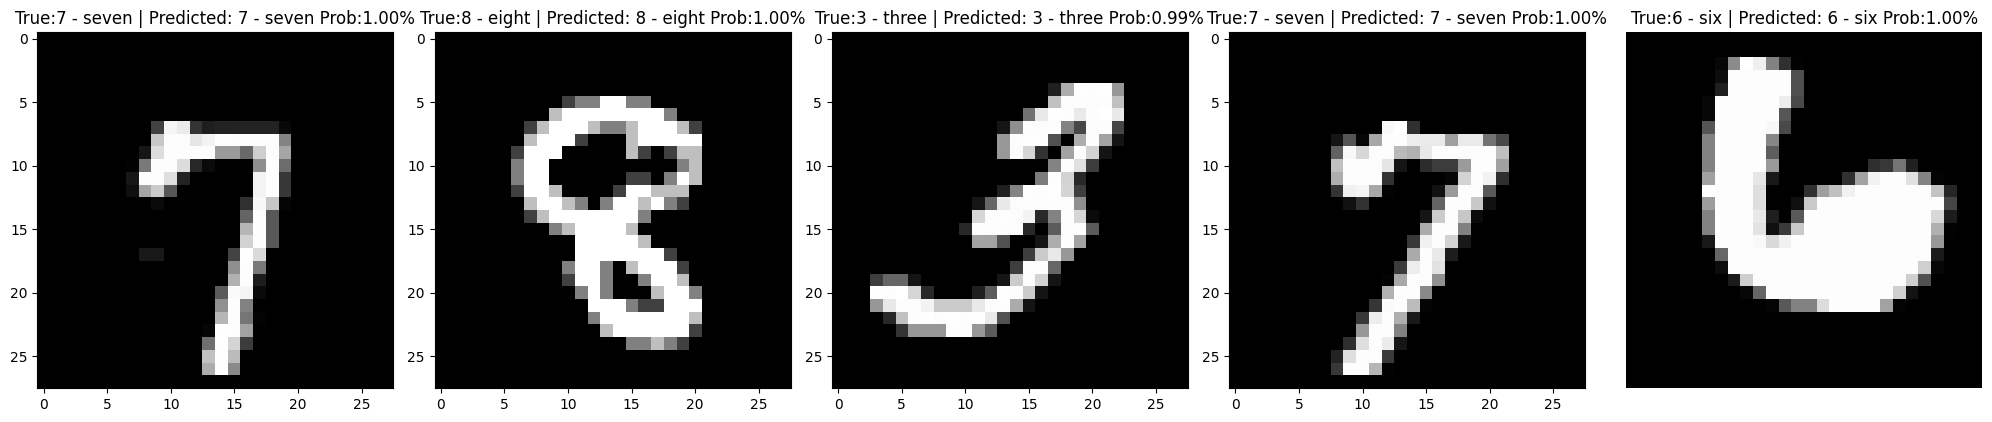

In [51]:
fig = plt.figure(figsize=(20 , 20))
for i in range(5):
    random_idx = torch.randint(0 , len(test_data) , size = [1]).item()
    random_image , random_label = train_data[random_idx]
    y_pred_prob = torch.softmax(model(random_image.unsqueeze(dim = 0 ).to(device)) , dim = 1)
    y_pred = y_pred_prob.argmax(dim = 1)
    fig.add_subplot(1 , 5 , i+1)
    plt.imshow(random_image.squeeze() , cmap = "gray")
    plt.title(f"True:{class_names[random_label]} | Predicted: {class_names[y_pred]} Prob:{y_pred_prob.max():.2f}%")
plt.tight_layout(pad = 1.0)
plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [59]:
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

In [53]:
torch.manual_seed(42)
y_preds = []
model.eval()
with torch.no_grad():
    for X , y in tqdm(test_dataloader):
        X , y = X.to(device) , y.to(device)
        y_logits = model(X)
        y_pred = torch.softmax(y_logits , dim = 1).argmax(dim = 1)
        y_preds.append(y_pred)
y_preds_tensor = torch.cat(y_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

In [65]:
len(y_preds) , y_preds_tensor.device

(313, device(type='cuda', index=0))

In [66]:
conf = ConfusionMatrix(num_classes= len(class_names) , task = "MULTICLASS")
conf_tensor = conf(preds = y_preds_tensor.cpu() , 
                  target = test_data.targets)

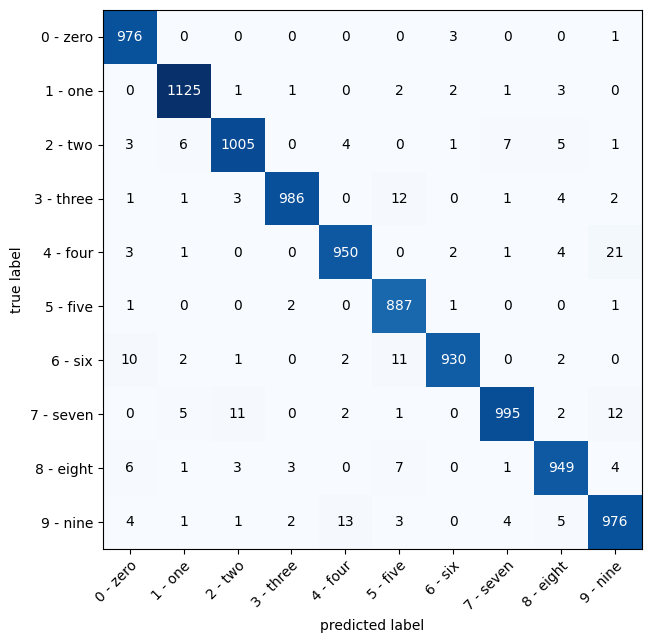

In [70]:
fig ,ax = plot_confusion_matrix(
    conf_tensor.numpy() , 
    class_names = class_names , 
    figsize = (10 , 7) , 
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [102]:
def convolution_operations( kernel_size , stride , padding):  
    random_tensor = torch.randn(size = (1,3,64,64))
    print(f"Random Tensor Shape: {random_tensor.shape}")
    rgb_image = random_tensor.squeeze().permute(1,2,0)
    print(f"RGB image shape{rgb_image.shape}")
    
    plt.figure(figsize = (12 , 7))
    plt.subplot(121)
    plt.imshow(rgb_image)
    plt.title("RGB Image")
    
    reverted_rgb_image = rgb_image.permute(2 , 0 , 1).unsqueeze(dim = 0 )
    conv = nn.Conv2d(in_channels = 3 , 
                    out_channels = 1 , 
                    kernel_size = kernel_size , 
                    stride = stride , 
                    padding = padding)
    convolve_image = conv(reverted_rgb_image)
    print(f"Shape of convolved image: {convolve_image.shape}")
    convolve_image = convolve_image.squeeze()
#     convolve_image = convolve_image.permute(1 , 2 , 0)
    print(f"RGB Convolve image shape {convolve_image.shape}")
    
    plt.subplot(122)
    plt.imshow(convolve_image.detach().numpy())
    plt.title("Convolve image")

Random Tensor Shape: torch.Size([1, 3, 64, 64])
RGB image shapetorch.Size([64, 64, 3])
Shape of convolved image: torch.Size([1, 1, 5, 5])
RGB Convolve image shape torch.Size([5, 5])


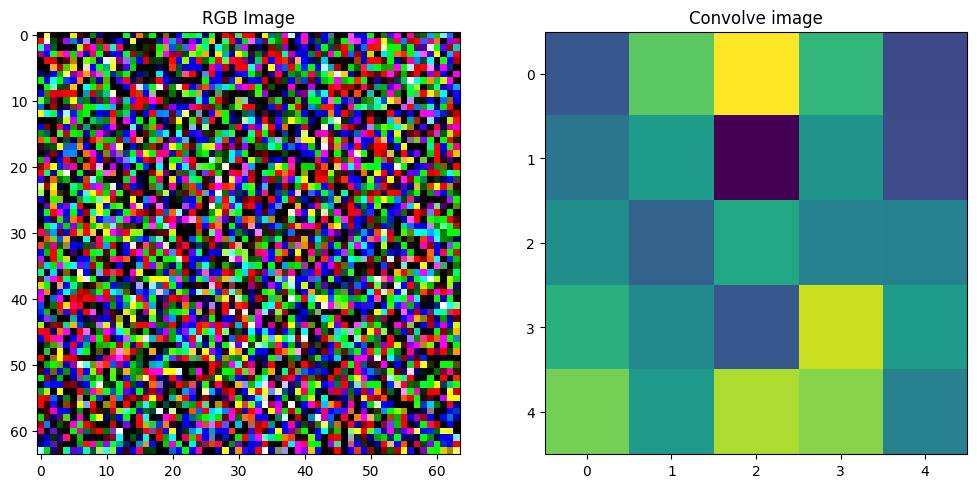

In [119]:
# torch.manual_seed(42)
convolution_operations(kernel_size = 64 , stride = 1 , padding = 2 )